# Credit Card Fraud Detection Capstone Project

## 1. Load Necessary Libraries

In [1]:
# Import necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils import resample
import numpy as np
import warnings
warnings.filterwarnings('ignore')
    

## 2. Load Data

In [2]:
# Load the dataset

file_path = 'creditcard.csv'
data = pd.read_csv(r'C:\Users\Optimus prim3\Desktop\creditcard.csv')
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

## 3. Data Cleaning and Quality Check

In [3]:
# Check for missing values and duplicates

data.isnull().sum()
data.duplicated().sum()

# Remove duplicates

data = data.drop_duplicates()
data.duplicated().sum()

0

## 4. Exploratory Data Analysis (EDA)

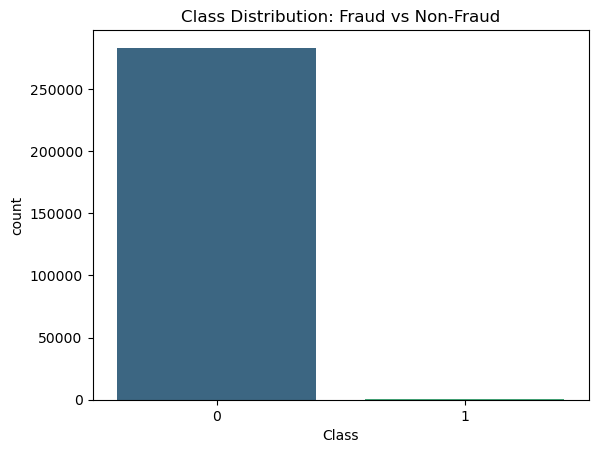

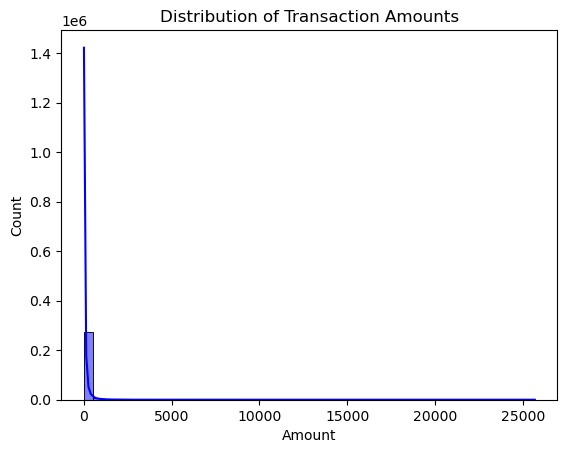

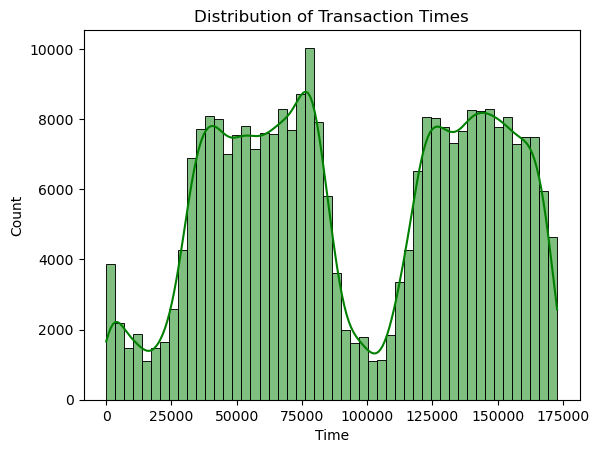

In [4]:
# Class distribution

sns.countplot(x='Class', data=data, palette='viridis')
plt.title('Class Distribution: Fraud vs Non-Fraud')
plt.show()

# Transaction amount distribution

sns.histplot(data['Amount'], bins=50, kde=True, color='blue')
plt.title('Distribution of Transaction Amounts')
plt.show()

# Transaction time distribution

sns.histplot(data['Time'], bins=50, kde=True, color='green')
plt.title('Distribution of Transaction Times')
plt.show()

## 5. Handle Imbalanced Data with Undersampling

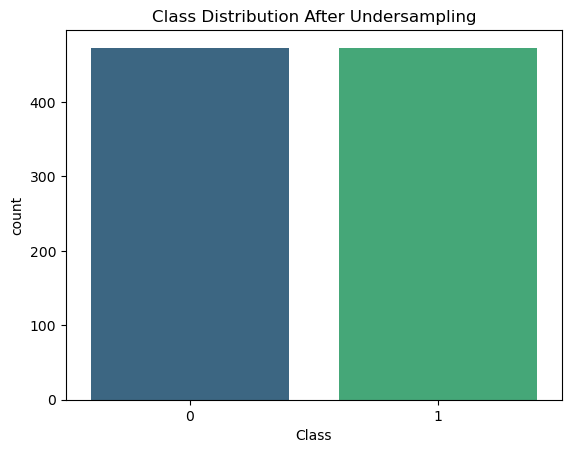

In [5]:
# Separate fraud and non-fraud cases

fraud = data[data['Class'] == 1]
non_fraud = data[data['Class'] == 0]

# Undersample non-fraud cases to match the number of fraud cases

non_fraud_undersampled = resample(non_fraud,
                                  replace=False,
                                  n_samples=len(fraud),
                                  random_state=42)

# Combine undersampled non-fraud with fraud cases

data_balanced = pd.concat([fraud, non_fraud_undersampled])

# Check new class distribution

sns.countplot(x='Class', data=data_balanced, palette='viridis')
plt.title('Class Distribution After Undersampling')
plt.show()

## 6. Feature Scaling

In [6]:
# Scale the 'Amount' and 'Time' features using StandardScaler

scaler = StandardScaler()
data_balanced[['Amount', 'Time']] = scaler.fit_transform(data_balanced[['Amount', 'Time']]) 

## 7. Train-Test Split

In [7]:
# Split into train and test sets

X = data_balanced.drop('Class', axis=1)
y = data_balanced['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 8. Model Training and Evaluation

In [8]:
# Train a Random Forest Classifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation

y_pred = model.predict(X_test)

# Classification report and confusion matrix

report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(report)
print(conf_matrix)
print(f'Accuracy: {accuracy:.2%}')
    

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       102
           1       1.00      0.95      0.98        88

    accuracy                           0.98       190
   macro avg       0.98      0.98      0.98       190
weighted avg       0.98      0.98      0.98       190

[[102   0]
 [  4  84]]
Accuracy: 97.89%


## 9. Hyperparameter Tuning

In [9]:

from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

# Perform Grid Search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model and score
best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)
    

Best parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best accuracy: 0.9232804232804233


## 10. Model Deployment Plan

In [10]:
# Model Deployment Plan:

import joblib
joblib.dump(best_model, 'credit_card_fraud_model.pkl')
print("Model saved as 'credit_card_fraud_model.pkl'")
    

Model saved as 'credit_card_fraud_model.pkl'
